<a href="https://colab.research.google.com/github/tady0725/machine_lr/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mL/Decision Trees/train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
data.shape

(891, 12)

In [3]:
import pandas as pd
import numpy as np

# 繪圖相關套件
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use( 'ggplot' ) 

# 標籤編碼(Label)、獨熱編碼(OneHot)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
# 決策樹(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
# 隨機森林(Random Forest)
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Sex,Survived
0,female,0.742
1,male,0.189


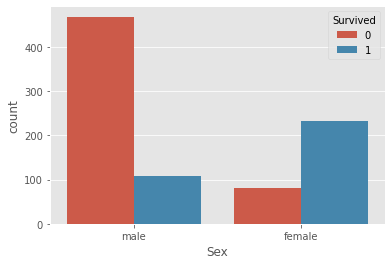

In [6]:
sns.countplot(data['Sex'],hue=data['Survived'])
display(data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().round(3))

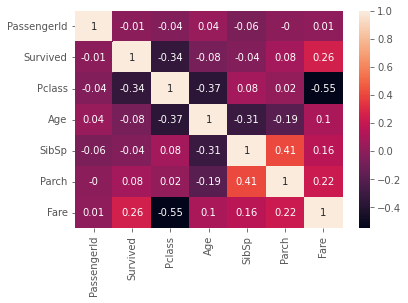

In [7]:
martix =data.corr().round(2)
sns.heatmap(data=martix,annot =True)

In [8]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [9]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [10]:
#label encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['Sex'] = labelencoder.fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [20]:
import numpy as np
X = pd.DataFrame(np.c_[data['Sex'], data['Age'],data['Parch'],data['Fare']], columns = ['Sex','Age','Parch','Fare'])
Y = data['Survived']

In [21]:
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1) # 將數據分成73比
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(x_train, y_train)
y_predict = decision_tree.predict(x_test) # 北test的資料用訓練出來的模型去預測



In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7686567164179104

[Text(0.53515625, 0.9166666666666666, 'X[0] <= 0.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(0.3359375, 0.75, 'X[3] <= 48.2\ngini = 0.387\nsamples = 217\nvalue = [57, 160]'),
 Text(0.234375, 0.5833333333333334, 'X[2] <= 3.5\ngini = 0.454\nsamples = 155\nvalue = [54, 101]'),
 Text(0.125, 0.4166666666666667, 'X[3] <= 10.481\ngini = 0.444\nsamples = 150\nvalue = [50, 100]'),
 Text(0.0625, 0.25, 'X[3] <= 8.04\ngini = 0.496\nsamples = 46\nvalue = [21, 25]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.457\nsamples = 34\nvalue = [12, 22]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.1875, 0.25, 'X[3] <= 13.95\ngini = 0.402\nsamples = 104\nvalue = [29, 75]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.447\nsamples = 80\nvalue = [27, 53]'),
 Text(0.34375, 0.4166666666666667, 'X[1] <= 39.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.31

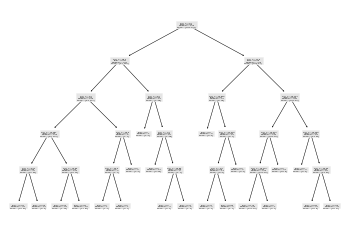

In [23]:

from sklearn import tree
tree.plot_tree(decision_tree)

In [24]:
pip install pydotplus

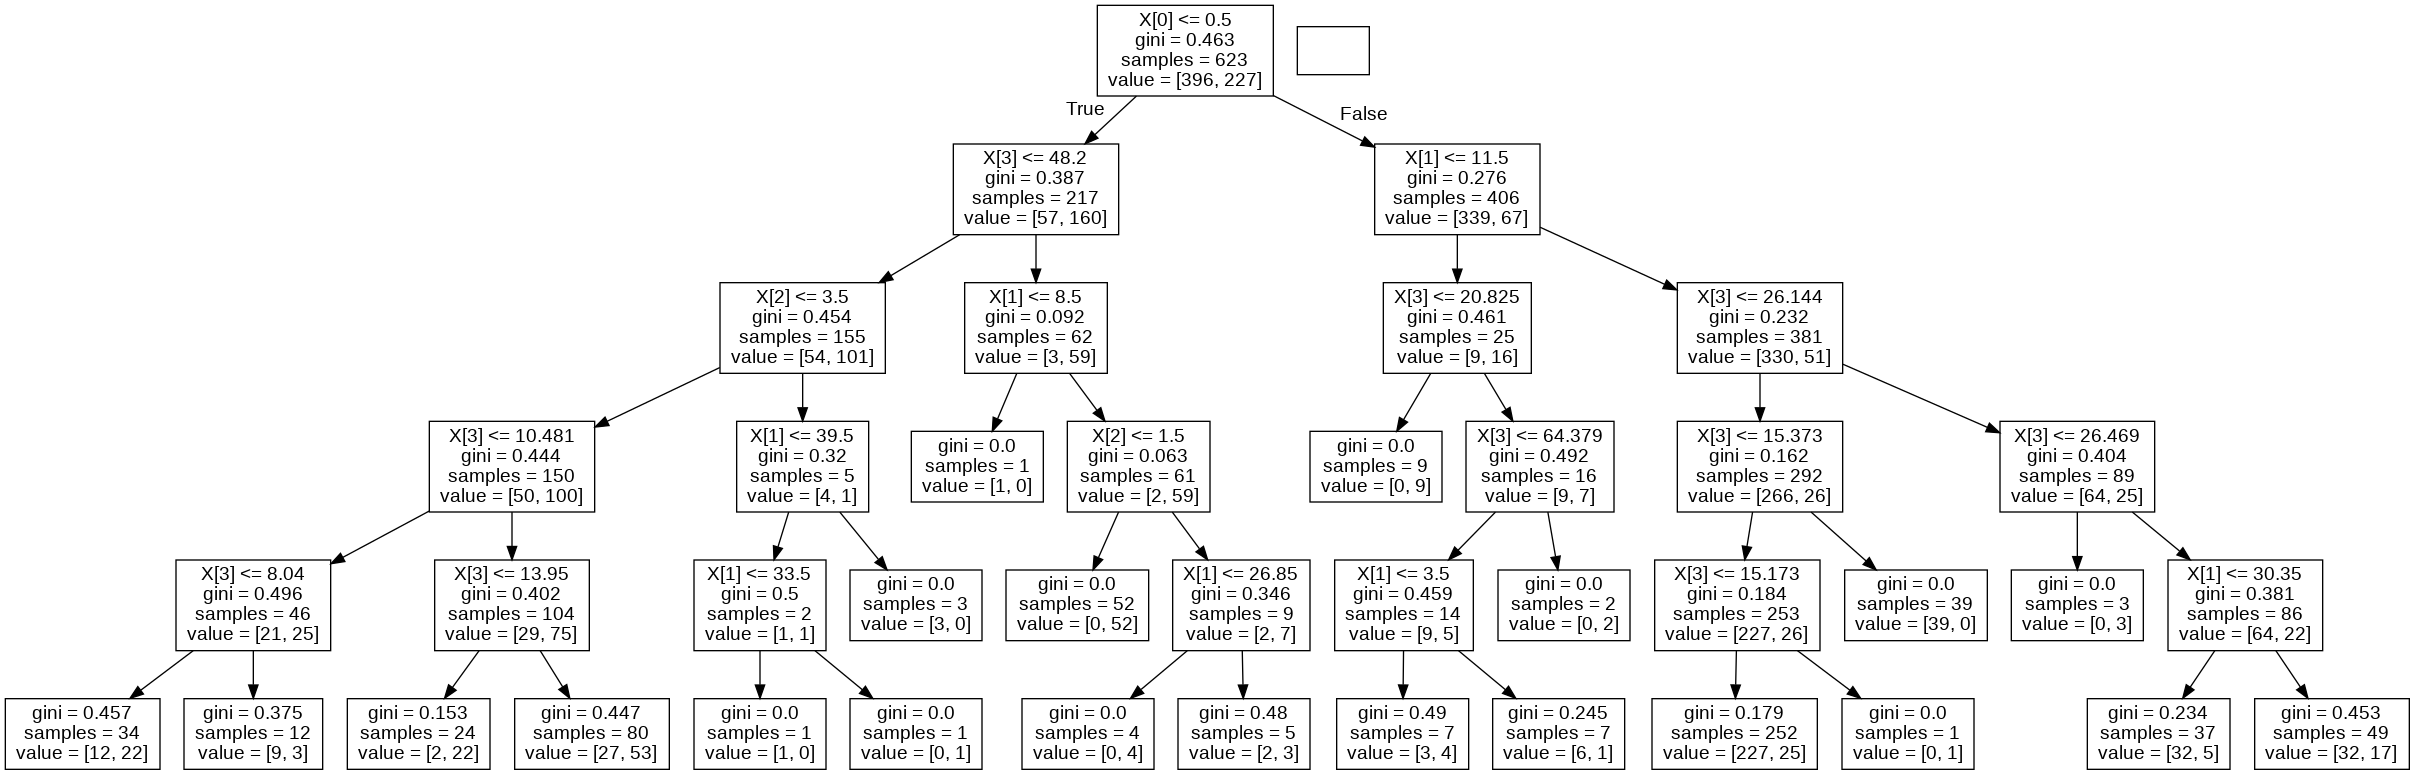

In [25]:
from io import StringIO
from IPython.display import Image, display
import pydotplus
out = StringIO()
tree.export_graphviz(decision_tree , out_file=out)

img = pydotplus.graph_from_dot_data(out.getvalue())
img.write_png('titanic.png')
from IPython.display import Image
Image(filename = 'titanic.png')
